# Lab 3.2


In [1]:
import numpy as np
import scipy.stats as st
import pandas as pd
import scipy.io as sio
import scipy.stats as st
import matplotlib.pyplot as plt

#### Load data.

In [2]:
# Read in a .csv file
data = pd.read_csv('pillows_example.csv')
data.tail()

,years,BLC_max,SLI_max
21,2006,761,1692
22,2007,99,597
23,2008,926,899
24,2009,439,935
25,2010,553,1023


#### Create figures.

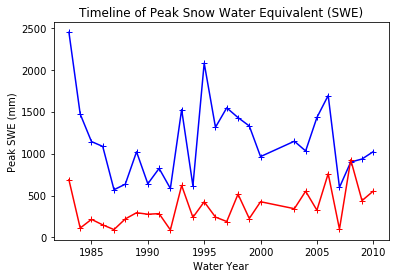

In [3]:
plt.plot(data['years'],data['SLI_max'],'b-+', label='Slide Canyon');
plt.plot(data['years'],data['BLC_max'],'r-+', label='Blue Canyon');

plt.title('Timeline of Peak Snow Water Equivalent (SWE)')
plt.xlabel('Water Year')
plt.ylabel('Peak SWE (mm)');

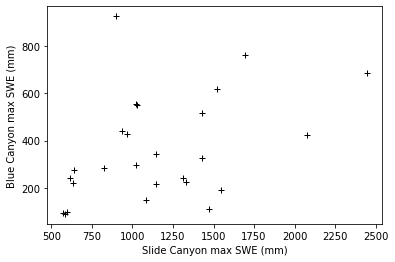

In [4]:
plt.plot(data['SLI_max'],data['BLC_max'],'k+');
plt.xlabel('Slide Canyon max SWE (mm)')
plt.ylabel('Blue Canyon max SWE (mm)');

#### Linear regression

In [5]:
n = data['SLI_max'].size;
B1 = (n* np.sum(data['BLC_max']*data['SLI_max']) - np.sum(data['BLC_max'])*np.sum(data['SLI_max']))/(n* np.sum(data['SLI_max']**2) - (np.sum(data['SLI_max']))**2);
B0 = np.mean(data['BLC_max']) - B1*np.mean(data['SLI_max']);

x = np.linspace(np.min(data['SLI_max']), np.max(data['SLI_max']),n)
y = B0 + B1*x

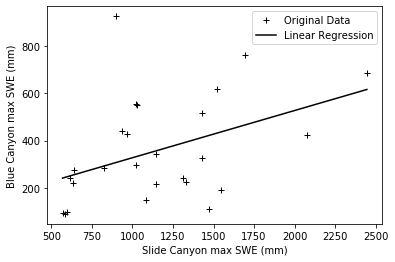

In [6]:
plt.plot(data['SLI_max'],data['BLC_max'],'k+',label='Original Data');
plt.xlabel('Slide Canyon max SWE (mm)')
plt.ylabel('Blue Canyon max SWE (mm)')
plt.plot(x,y,'k-',label='Linear Regression');
plt.legend()

#### Residuals of this linear regression fit

In [7]:
resid = data['BLC_max'] - (B0 + B1*(data['SLI_max']));

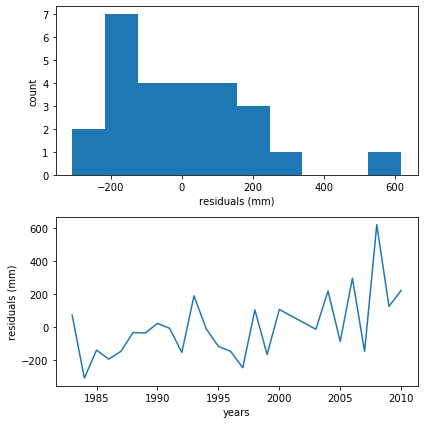

In [8]:
f, (ax1, ax2) = plt.subplots(2,1,figsize=(6,6))
ax1.hist(resid)
ax1.set_xlabel('residuals (mm)')
ax1.set_ylabel('count')


ax2.plot(data['years'],resid)
ax2.set_xlabel('years')
ax2.set_ylabel('residuals (mm)')

f.tight_layout()

Test for positive slope

Is there a significant positive relationship between snow depth at SLI and BLC?

In [9]:
## Test for positive slope
SSE = np.sum((B0 + B1*data['SLI_max'] - data['BLC_max'])**2);

standard_err = np.sqrt(SSE/(n - 2));

s_B1 = np.sqrt(standard_err**2 / (np.sum((data['SLI_max'] - np.mean(data['SLI_max']))**2)));

t_95_24 = 1.711;

t = B1/s_B1;

print(t)

2.2996284181716447


You can instead use a numpy function to perform the same linear regression that you did manually

In [10]:
# Read the documentation
np.polyfit?

In [11]:
Bv2 = np.polyfit(data['SLI_max'],data['BLC_max'],1)
print(Bv2)

x = np.linspace(np.min(data['SLI_max']), np.max(data['SLI_max']),n)
y = Bv2[1] + Bv2[0]*x

[  0.1996806  127.91431327]


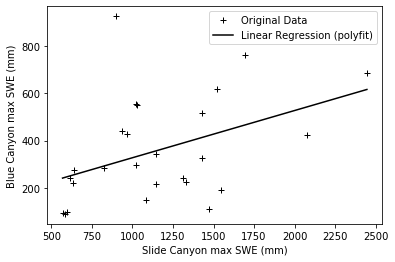

In [12]:
plt.plot(data['SLI_max'],data['BLC_max'],'k+',label='Original Data');
plt.xlabel('Slide Canyon max SWE (mm)')
plt.ylabel('Blue Canyon max SWE (mm)')
plt.plot(x,y,'k-',label='Linear Regression (polyfit)');
plt.legend()

#### Calculate the correlation coefficient for our two snow measurements

Note that numpy.corrcoef only gives you the R values, not P

This gives a matrix of results. These are correlation of x with itself (should be 1), of x with y, of y with x, and of y with itself (should be 1) 

In [13]:
# Read the documentation
np.corrcoef?

In [14]:
Sxy = np.sum((data['SLI_max']-np.mean(data['SLI_max']))*(data['BLC_max']-np.mean(data['BLC_max'])));
r = Sxy / (np.sqrt(np.sum((data['SLI_max']-np.mean(data['SLI_max']))**2)) * np.sqrt(np.sum((data['BLC_max']-np.mean(data['BLC_max']))**2)));

# np.corrcoef only gives you the R values, not P
R = np.corrcoef(data['SLI_max'],data['BLC_max']);
print(R)

[[1.        0.4249234]
 [0.4249234 1.       ]]


Whereas scipy.stats.pearsonr will give us a single R and P value

P gives you the corresponding p-values to determine the significance of the correlation

In [15]:
# Read the documentation
st.pearsonr?

In [16]:
R, P = st.pearsonr(data['SLI_max'],data['BLC_max'])
print(R)
print(P)

0.4249234045616491
0.03047392304371896


#### Multiple Regression

In [17]:
from scipy.linalg import lstsq

# Read the documentation
lstsq?

In [18]:
Xmulti = np.array([ data['SLI_max'],
                   np.linspace(1,data['years'].size,data['years'].size),
                   np.ones_like(data['years'])]).T
print(Xmulti.shape)
print(data['BLC_max'].shape)

(26, 3)
(26,)


In [19]:
B, res, rnk, s = lstsq(Xmulti, data['BLC_max'])
print(B)

[  0.22156219  13.77959269 -83.33208798]


Plot the the result of the two different regression methods.

Note that you will need to use the function np.dot()

In [20]:
# Read the documentation
np.dot?

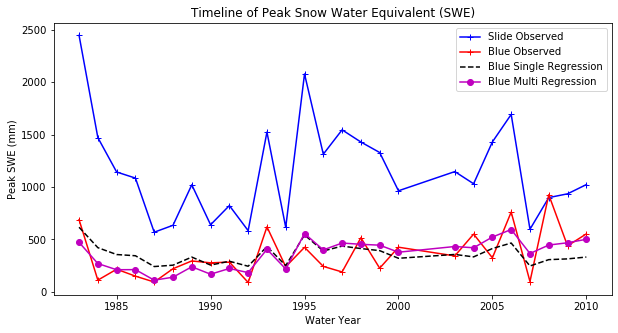

In [21]:
# Original data:
plt.figure(figsize=(10,5))
plt.plot(data['years'],data['SLI_max'],'b-+', label='Slide Observed');
plt.plot(data['years'],data['BLC_max'],'r-+', label='Blue Observed');

# Predicted with linear regression between Slide Canyon and Blue Canyon
plt.plot(data['years'],B0 + B1*data['SLI_max'],'k--', label='Blue Single Regression')
plt.plot(data['years'],Xmulti.dot(B),'m-o', label='Blue Multi Regression')

plt.legend()
plt.title('Timeline of Peak Snow Water Equivalent (SWE)')
plt.xlabel('Water Year')
plt.ylabel('Peak SWE (mm)');

Cumulative Difference

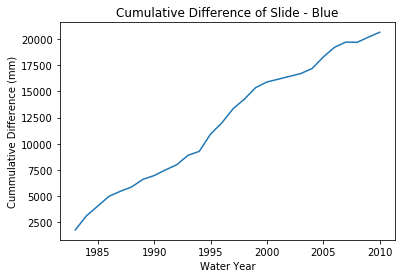

In [22]:
f, ax = plt.subplots(1)
ax.plot(data['years'], np.cumsum(data['SLI_max'] - data['BLC_max']))
ax.set_title('Cumulative Difference of Slide - Blue')
ax.set_ylabel('Cummulative Difference (mm)')
ax.set_xlabel('Water Year');